# Final Project Submission

Please fill out:
* Student name: Natalia Edelson
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Jeffery Herman
* Blog post URL:


# OSEMiN 
## Obtaining:
  

In [100]:
# Import the neccessary libraries 
import pandas as pd 
import statsmodels as sm
from   statsmodels.api import formula 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the data 
df = pd.read_csv("kc_house_data.csv",parse_dates =['date'])

# look that the data has been uploaded properly and have a first glance ...
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(12), object(1)
memory us

## Scrubbing:

#### Let's start by cleaning the data. When we clean the data we should have a few goals in mind.
     * Detect the NaN values  and '?' place holders. Decide how best to handle them.  
     * Look closely into the information of the data to check if values are missing.   
       Also, if numerical values are shown as objects, it suggests that there are place 
       holders such as '?'.
     * Search for outliers and assess whether they should be removed. 







####  Notes from info()

   * waterfront, view and yr_renovated have missing values since it shows fewer values 
     versus the data points in the other columns
   * sqft_basement is an object and it should be a number 





#### Let's sum the null values 

In [102]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Visualizing NaN values 

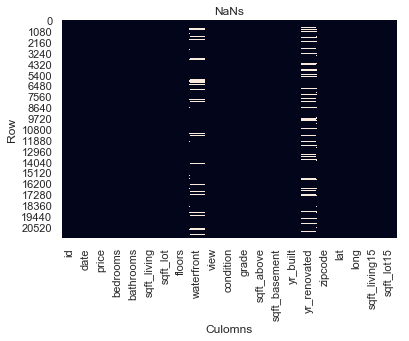

In [103]:
# Use the heatmap code which shows the contrast well.

sns.heatmap(df.isnull(), cbar=False)
plt.title("NaNs")
plt.xlabel('Culomns')
plt.ylabel('Row')
plt.show()


#### Let's check how many null values there are look at what else needs to be cleaned 
    - Date and sqft_basement both need to be cleaned since they show 'object' as their data type and we should only be seeing a number     
    - Need to look closely into each of the follwoing ones:
         * bedrooms  - only two values have NaNs; therefore I will drop the rows - it 
         won't have much impact  
         * waterfront  - I decided to change all the NaNs to '0' i.e. houses without 
         waterfront given that most of the data for that variable indicates as such. 
         * view  - only 63 values show NaNs and therefore I will drop the rows - it won't 
         have much impact  
         * yr_renovated - I will drop this column given that there are too many NaN 
         values.

In [104]:
# Let's drop all the rows in which there are NaNs in the bedroom column. 
df = df.dropna(subset=['bedrooms'])

In [105]:
# Let's drop all the rows in which there is NaNs in the view column. 
df = df.dropna(subset=['view'])

In [106]:
# We will run the is sum of null code again to see what's left.  
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Examining closely the Waterfront variable

In [107]:
# Counting to see how many houses are with and how many are without waterfront 
df.waterfront.value_counts()

0.0    19019
1.0      145
Name: waterfront, dtype: int64

##### I decided to replace the NaN values with 0 given that the majority of the data was without waterfront. Also, it was a fair amount of data (evidently presented in my NaNs graph above). If we would have removed the rows we would have lost a lot of the data from all the other columns that potentially could be useful to predict our model. 

In [108]:
#Replacig NaNs with zero.
df.waterfront.fillna(0,inplace=True)


#### Assessing closely the yr_renovated column
         Before we are deleting the column we want to check a few items.
             * correlation to price
             * unique values  
             * visualization 
             * % of the NaNs in the column


In [109]:
df[['price','yr_renovated']].corr()


,price,yr_renovated
price,1.000000,0.129887
yr_renovated,0.129887,1.000000


In [110]:
df.yr_renovated.unique()


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

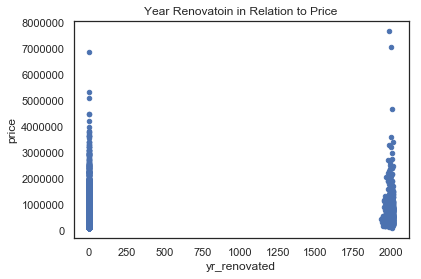

In [111]:
df.plot(kind="scatter", x="yr_renovated", y="price",)
plt.title("Year Renovatoin in Relation to Price")
plt.show()



In [112]:
# Let's check the percentage of the yr renovated na values 
3830/21597


0.17733944529332776

#### It seems that the data was not logged in properly and that there is not much correlation to when the houses were renovated to house prices. Given the large number of NaNs values and 0s, I am removing the column all together. 

In [113]:
df.drop(['yr_renovated'], axis =1, inplace=True)

#### Date Column
#### Let's create two new columns, 'month' and 'year' by extracting them from the date column. It can help me detect any seasonlity trends.



In [114]:
# using a def & lambda function will make the extraction more efficient 
def extract_date(df,column):
    df[column+"year"] = df[column].apply(lambda x: x.year)
    df[column+"_month"] = df[column].apply(lambda x: x.month)
    

In [115]:
extract_date(df,'date')

In [116]:
# Making sure that the two columns were added
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0,1955,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,98074,47.6168,-122.045,1800,7503,2015,2


In [117]:
 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null int64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dateyear         21534 non-null int64
date_month       21534 non-null int64
dtypes: datetime64[ns](1), float6

#### As noted above, the data type of sqft.basement is an object which is due to the space holder '?' and '0'. I will replace it with NaN and then drop the NaNs values.

In [118]:
# Replacing '?' with NaN.
df.sqft_basement.replace('?', np.nan, inplace = True)

In [119]:
# Replacing '0' with NaN.
df.sqft_basement.replace('0', np.nan, inplace = True)

In [120]:
# Dropping NaNs from Sqft Basemment 
df.dropna(subset=['sqft_basement'],inplace =True)

In [121]:
# I am checking all the values to make sure that '?' was removed.
df.sqft_basement.unique()

array(['400', '910', '1530', '730', '1700', '300', '970', '760', '720',
       '700', '820', '780', '790', '330', '1620', '360', '588', '1510',
       '410', '990', '600', '560', '550', '1000', '1600', '500', '1040',
       '880', '1010', '240', '265', '290', '800', '540', '840', '380',
       '770', '480', '570', '1490', '620', '1250', '1270', '120', '650',
       '180', '1130', '450', '1640', '1460', '1020', '1030', '750', '640',
       '1070', '490', '1310', '630', '2000', '390', '430', '210', '1430',
       '1950', '440', '220', '1160', '860', '580', '2060', '1820', '1180',
       '200', '1150', '1200', '680', '530', '1450', '1170', '1080', '960',
       '280', '870', '1100', '460', '1400', '660', '1220', '900', '420',
       '1580', '1380', '475', '690', '270', '350', '935', '710', '1370',
       '980', '850', '1470', '160', '950', '50', '740', '1780', '1900',
       '340', '470', '370', '140', '1760', '130', '520', '890', '1110',
       '150', '1720', '810', '190', '1290', '670',

In [122]:
# Since it still shows as an object, let's convert the data type to int64
df.sqft_basement = df.sqft_basement.astype(int)

#### NaNs in Bedroom Column 

In [123]:
#I will dorp the NaNs rows from the bedrooms cloumn given that there are not that many NaNs
df.dropna(subset=['bedrooms'],inplace =True)

In [124]:
# Confirming data type 
df.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dateyear                  int64
date_month                int64
dtype: object

###  Continuing Scrubing 
#### * There are some categorical variables such as: waterfront, view, condition, grade, yr_built and zip code. I won't be looking into the mean/STD 
#### * The maximum square feet is 13,450 and the minimum is 680 which suggests a widely distributed data.
#### * In the bedroom column the maximum number is 33 and this seems to be an outlier or perhaps even a place holder ... we will remove that data point below.



In [125]:
# Final double check that all the NaNs have been cleaned. 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dateyear         0
date_month       0
dtype: int64

In [126]:
# I will remove 33 in the bedrooms column given that it is an outlier. I will use the idxmax() method  
df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax())
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
count,8.284000e+03,8.284000e+03,8283.000000,8284.000000,8284.000000,8.284000e+03,8284.000000,8284.000000,8284.000000,8284.000000,...,8284.000000,8284.000000,8284.000000,8284.000000,8284.00000,8284.000000,8284.000000,8284.000000,8284.000000,8284.000000
mean,4.594949e+09,6.222646e+05,3.554630,2.271065,2312.629406,1.326375e+04,1.321704,0.010744,0.405722,3.516659,...,1571.145703,741.483704,1964.919363,98088.754587,47.58411,-122.255394,2024.377233,11311.890512,2014.318928,6.600555
std,2.873921e+09,4.409331e+05,0.956683,0.776049,951.507491,3.288693e+04,0.476245,0.103099,0.979530,0.697238,...,719.964305,404.273916,28.352062,55.694387,0.12227,0.118839,663.004275,23330.515318,0.466089,3.103573
min,1.200019e+06,1.000000e+05,1.000000,0.500000,680.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,...,480.000000,10.000000,1900.000000,98001.000000,47.17750,-122.514000,460.000000,651.000000,2014.000000,1.000000
25%,2.141308e+09,3.750000e+05,3.000000,1.750000,1680.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,...,1120.000000,450.000000,1947.000000,98034.000000,47.52200,-122.351000,1560.000000,5000.000000,2014.000000,4.000000
50%,3.947900e+09,5.150000e+05,3.000000,2.250000,2100.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,...,1370.000000,700.000000,1966.000000,98105.000000,47.59760,-122.288000,1880.000000,7560.000000,2014.000000,6.000000
75%,7.314275e+09,7.120000e+05,4.000000,2.750000,2710.000000,1.071025e+04,2.000000,0.000000,0.000000,4.000000,...,1780.000000,980.000000,1983.000000,98125.000000,47.67960,-122.179750,2330.000000,10016.500000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,98199.000000,47.77760,-121.321000,6110.000000,871200.000000,2015.000000,12.000000


### Handling Categorical Variables

##### Here are all the categorical features which we will convert to dummy variables either bind them or use the one-hot-encoding.
    * view
    * condition
    * grade
    * yr_built 
    * zipcode
    * date_month


##### Zipcode

In [127]:
# I will group the zipcodes and check their mean so that I could see if there is any pattern of the prices 
GB_ZC = df.groupby(['zipcode'])['price'].mean()

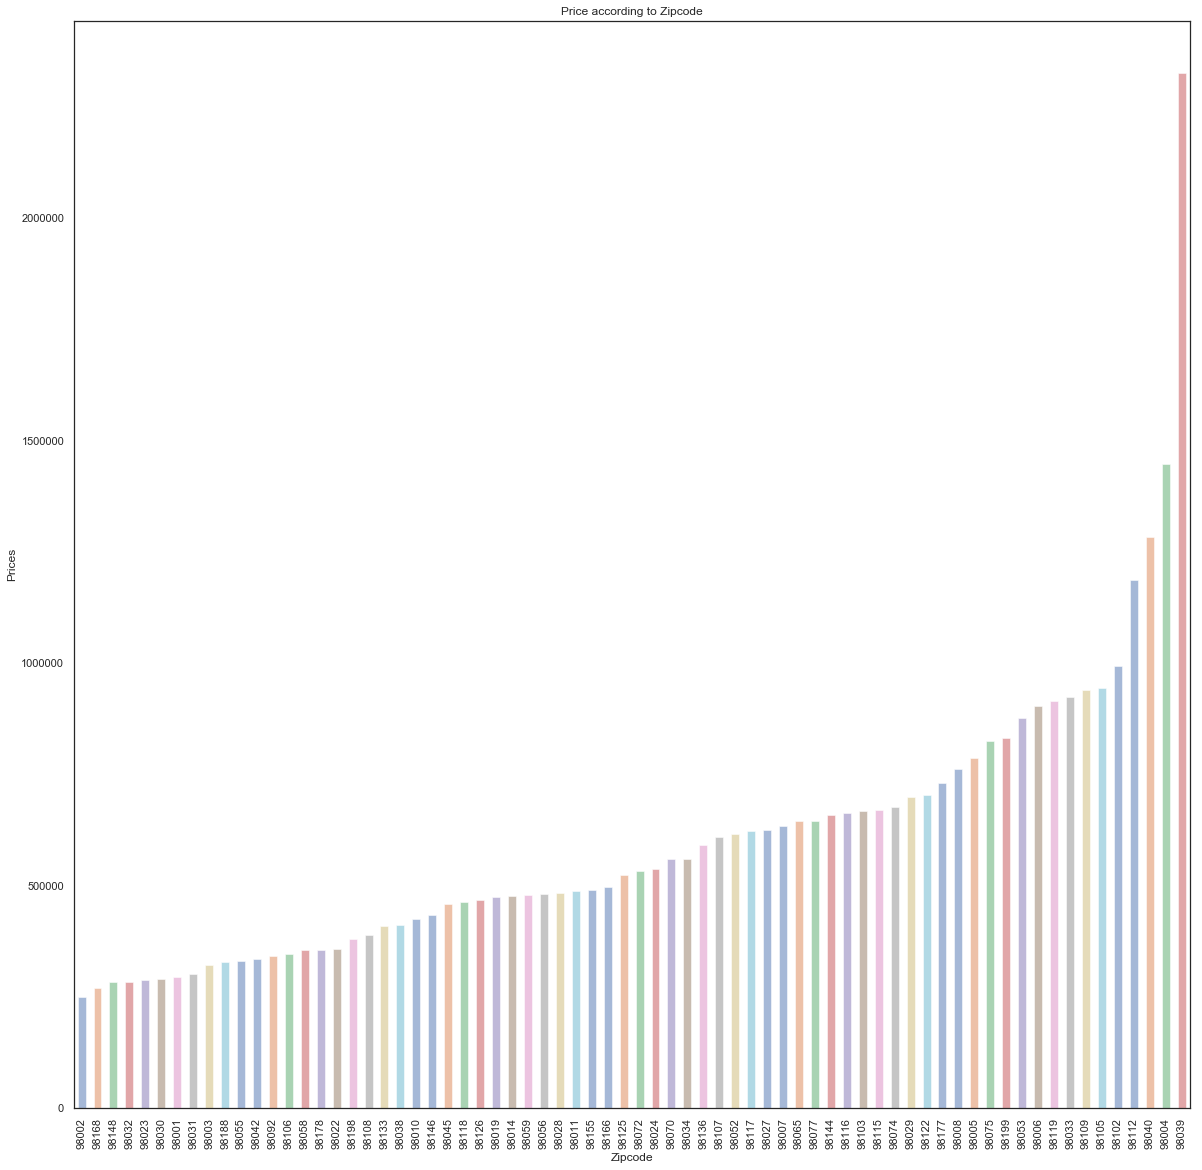

In [128]:
# Let's view the data with a sorted value
GB_ZC = GB_ZC.sort_values()
GB_ZC.plot(kind='bar',x='zipcode',y='price',align='center', alpha=0.5,figsize=(20,20))
# the plot gets saved to 'output.png'
plt.savefig('output.png')
plt.title('Price according to Zipcode' )
plt.xlabel('Zipcode')
plt.ylabel('Prices')
plt.show()

#### The zipcode variable/column is not a great predictor given the large number of categories(i.e # of Zipcode).
#### It could potentially help predicting 3 tiers of a range of prices but given that it will not be very precise, I will drop that column. 

In [129]:
df.drop(['zipcode'], axis =1, inplace=True)

#### Waterfront

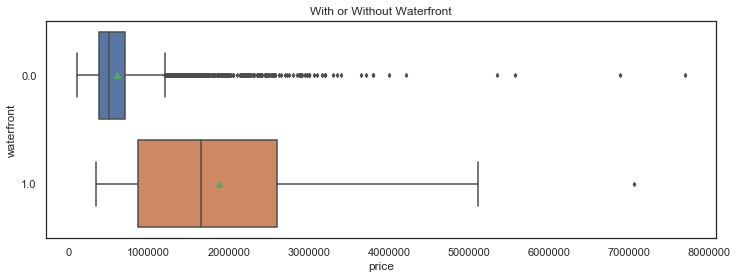

point biserial correlation r is 0.29618154233642374 with p = 2.2622028042666543e-167


In [130]:
# We would need to visualize the data to clearly see where the data rests. Let's use boxplot to visualize waterfront:
from scipy import stats, linalg

fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(y = df['waterfront'], x = df['price'],width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.title('With or Without Waterfront')
plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(df['waterfront'], df['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))


#### We can see that the range of prices for most houses with waterfront are wider. Whereas the houses without waterfront are mostly concentrated but go as high as the ones with a waterfront. Additionally,  without waterfront there aren't as many outliers.


In [131]:
# Let's check yr_built stats and asses the virable. 
df.yr_built.describe()



count    8284.000000
mean     1964.919363
std        28.352062
min      1900.000000
25%      1947.000000
50%      1966.000000
75%      1983.000000
max      2015.000000
Name: yr_built, dtype: float64

In [132]:
# Here are the  bins  based on the values observed above. 5 values will result in 4 bins

bins = [0, 1952, 1975, 1990, 1997, 2015]

#We'll pd.cut method to separate data into bins.
bins_yr_built = pd.cut(df['yr_built'], bins)

#We'll use .cat.as_unordered() method transforming the data to ordered categories.
bins_yr_built = bins_yr_built.cat.as_unordered()
#bins_yr_built.head()


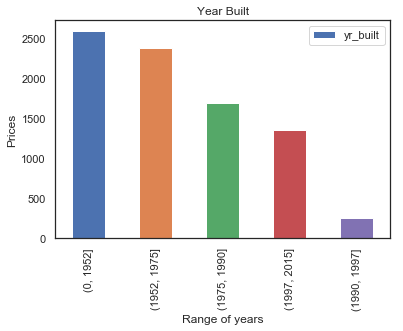

In [133]:
#Let's visualize the bins
bins_yr_built.value_counts().plot(kind='bar')
plt.xlabel('Range of years')
plt.ylabel('Prices')
plt.title('Year Built')
plt.legend()
plt.show()


In [134]:
# Let's add the binds_yr_ built to a new column of our data.
df['bins_yr_built'] = bins_yr_built 


#### Converting the categorical variables to dummy variables 

In [135]:
# Here we are converting the categorical variables into dummy variables so that it will allow us to build a model later on. 
WF_dummies = pd.get_dummies(df["waterfront"], prefix="WV")
View_dummies = pd.get_dummies(df["view"], prefix="View")
Con_dummies = pd.get_dummies(df["condition"], prefix="Con")
Grade_dummies = pd.get_dummies(df["grade"], prefix="Grade")
Month_dummies = pd.get_dummies(df["date_month"], prefix="Month")
bins_yr_built_dummies = pd.get_dummies(df["bins_yr_built"], prefix="bins_yr_built")



In [136]:
# Add the new dummy variables to the data frame
df = pd.concat([df, WF_dummies , View_dummies, Con_dummies,Grade_dummies, Month_dummies, bins_yr_built], axis=1)

df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,yr_built
1,6414100192,2014-12-09,538000,3.0,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,"(0, 1952]"
3,2487200875,2014-12-09,604000,4.0,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,"(1952, 1975]"
5,7237550310,2014-05-12,1230000,4.0,4.50,5420,101930,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,"(1997, 2015]"
8,2414600126,2015-04-15,229500,3.0,1.00,1780,7470,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,"(1952, 1975]"
10,1736800520,2015-04-03,662500,3.0,2.50,3560,9796,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,"(1952, 1975]"


####  Let's drop the categorical values as we have transformed all the categorical values to either dummy  or binned ones


In [137]:
df.drop(['waterfront','view','condition','grade','date_month','yr_built', 'bins_yr_built'], axis =1, inplace=True)




#### Let's run info again to double check that I have removed all the old categoricl values. 

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8284 entries, 1 to 21591
Data columns (total 49 columns):
id               8284 non-null int64
date             8284 non-null datetime64[ns]
price            8284 non-null int64
bedrooms         8283 non-null float64
bathrooms        8284 non-null float64
sqft_living      8284 non-null int64
sqft_lot         8284 non-null int64
floors           8284 non-null float64
sqft_above       8284 non-null int64
sqft_basement    8284 non-null int64
lat              8284 non-null float64
long             8284 non-null float64
sqft_living15    8284 non-null int64
sqft_lot15       8284 non-null int64
dateyear         8284 non-null int64
WV_0.0           8284 non-null uint8
WV_1.0           8284 non-null uint8
View_0.0         8284 non-null uint8
View_1.0         8284 non-null uint8
View_2.0         8284 non-null uint8
View_3.0         8284 non-null uint8
View_4.0         8284 non-null uint8
Con_1            8284 non-null uint8
Con_2            8284 

## Exploring:

#### Let's visualize the continues variables of our data and check for any patterns. Specifically, detect any linear relationships 

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


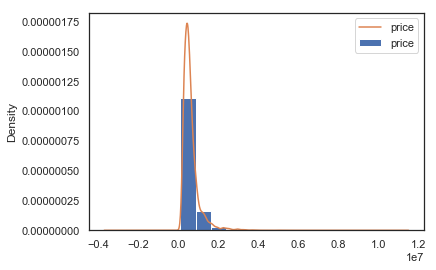

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


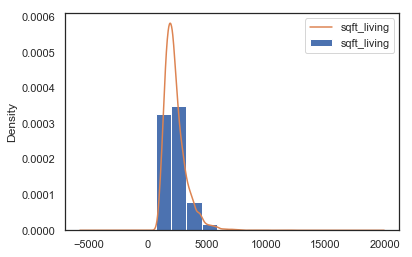

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


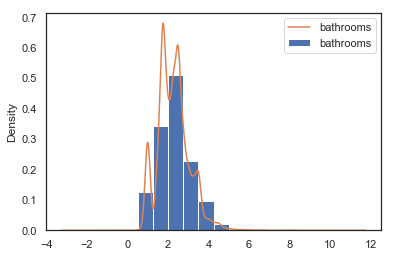

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


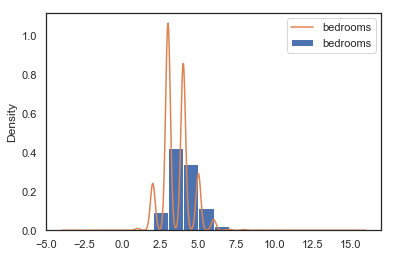

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


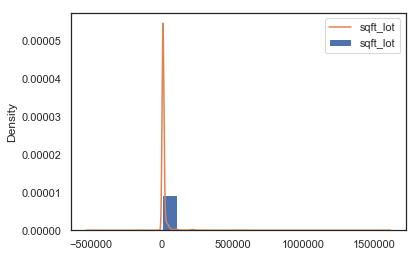

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


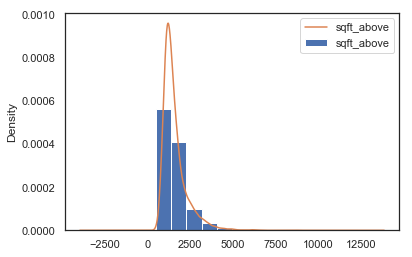

In [139]:
# We run a for loop function to build histogram and density estimate plot. 
for column in ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_above']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()
    

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


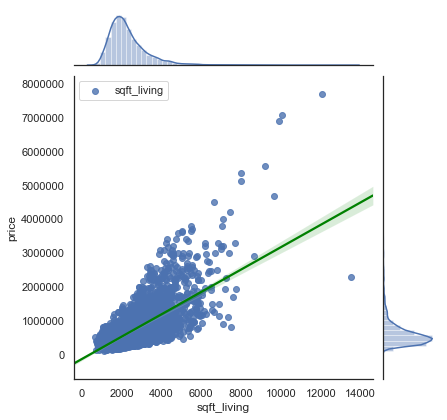

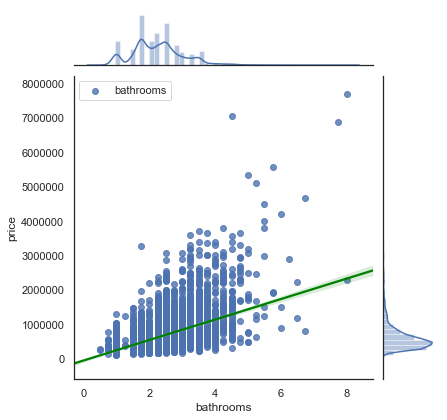

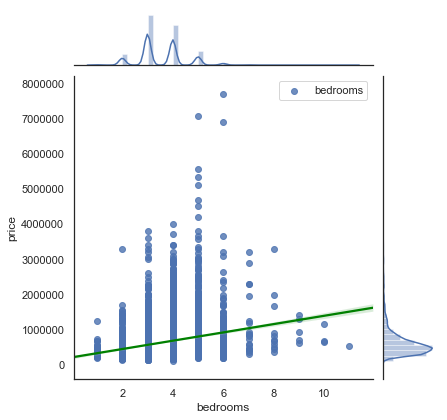

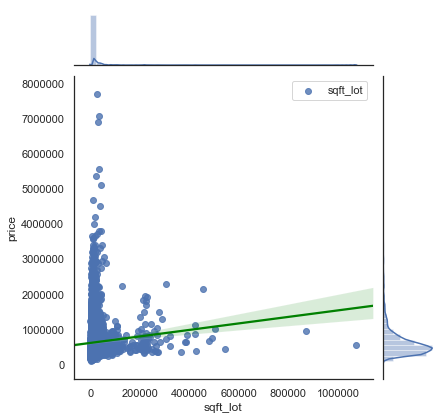

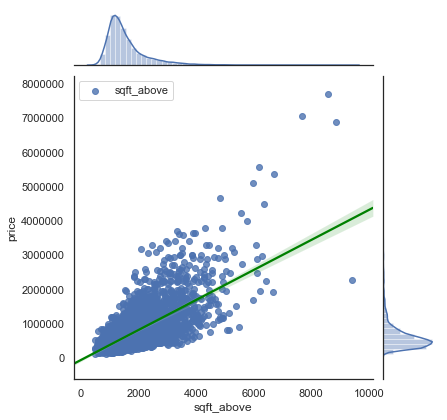

In [140]:
for column in [ 'sqft_living', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_above']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()
    
    

#### The above variables show a linear relationship to price, especially we see a strong linear relationship with 'sqft_living', 'bathrooms', 'sqft_above' to ‘price’. 

## Normalizing some of the data 

#### According to our graphs above it appears that the following variables need to be normalized.  sqft_lot, bedrooms, and bathrooms.

In [141]:
# We do not have negative values, therefore, we can perform normalization on the selected data.
np.log(df[["sqft_lot","bedrooms", "bathrooms"]]).describe()


,sqft_lot,bedrooms,bathrooms
count,8284.000000,8283.000000,8284.000000
mean,8.933253,1.231805,0.760128
std,0.885488,0.274310,0.355566
min,6.349139,0.000000,-0.693147
25%,8.517193,1.098612,0.559616
50%,8.930626,1.098612,0.810930
75%,9.278957,1.386294,1.011601
max,13.887104,2.397895,2.079442


In [142]:
df_sqft_lot_log= df['sqft_lot']
df_sqft_lot_log= np.log(df_sqft_lot_log)

In [143]:
df_bedrooms_log= df['bedrooms']
df_bedrooms_log= np.log(df_bedrooms_log)

In [144]:
df_bathrooms_log= df['bathrooms']
df_bathrooms_log= np.log(df_bathrooms_log)

#### Let's add the newly normalized columns into the our data frame.

In [145]:
df['df_sqft_lot_log'] = df_sqft_lot_log

In [146]:
df['df_bedrooms_log'] = df_bedrooms_log

In [147]:
df['df_bathrooms_log'] = df_bathrooms_log

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


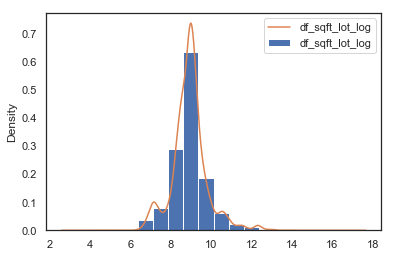

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


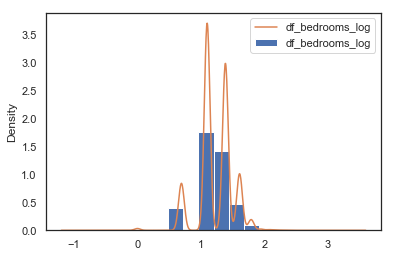

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


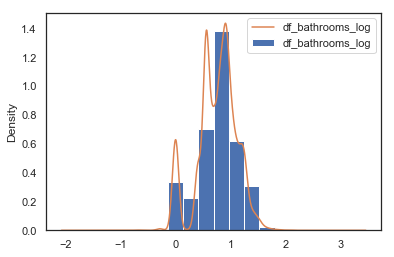

In [148]:
# We are redoing the for loop to examine  the change in the transformation. 
for column in ['df_sqft_lot_log', 'df_bedrooms_log', 'df_bathrooms_log']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column )
    plt.legend()    
    plt.show()

#### Sqft_lot saw the most impact from the normalization transformation. The other variables had a slight improvement. 

##### I will keep the normelized data and remove the orignial data 

In [149]:
df.drop([ 'sqft_lot','bedrooms','bathrooms'], axis =1, inplace=True)

In [150]:
df.head()



,id,date,price,sqft_living,floors,sqft_above,sqft_basement,lat,long,sqft_living15,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,df_sqft_lot_log,df_bedrooms_log,df_bathrooms_log
1,6414100192,2014-12-09,538000,2570,2.0,2170,400,47.7210,-122.319,1690,...,0,0,0,0,0,0,1,8.887653,1.098612,0.810930
3,2487200875,2014-12-09,604000,1960,1.0,1050,910,47.5208,-122.393,1360,...,0,0,0,0,0,0,1,8.517193,1.386294,1.098612
5,7237550310,2014-05-12,1230000,5420,1.0,3890,1530,47.6561,-122.005,4760,...,0,0,0,0,0,0,0,11.532042,1.386294,1.504077
8,2414600126,2015-04-15,229500,1780,1.0,1050,730,47.5123,-122.337,1780,...,0,0,0,0,0,0,0,8.918650,1.098612,0.000000
10,1736800520,2015-04-03,662500,3560,1.0,1860,1700,47.6007,-122.145,2210,...,0,0,0,0,0,0,0,9.189729,1.098612,0.916291


### Correlation

#### Let's check the correlation among the main variables.

In [151]:
df_final = df[['price','sqft_living','floors', 'sqft_basement','sqft_living15','sqft_lot15','sqft_above','lat','long','df_sqft_lot_log','df_bedrooms_log','df_bathrooms_log']]

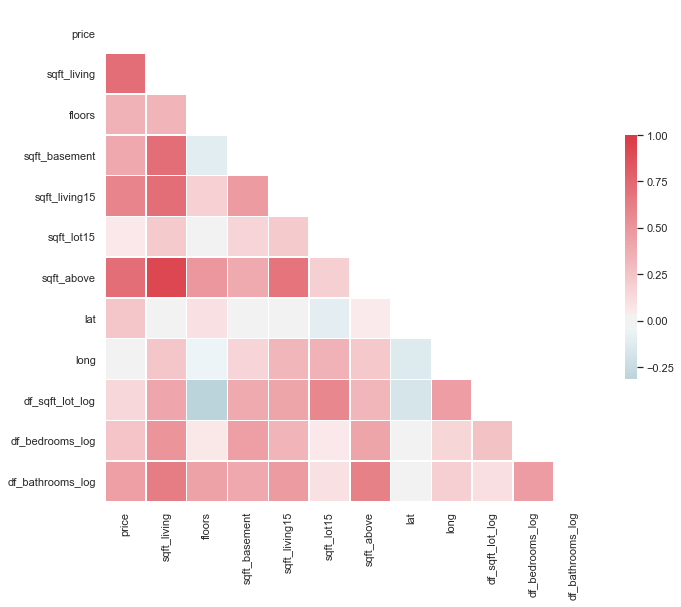

In [152]:
# We will use the sns heatmap code to build the corr. matrix. At times, it is easier to see only half 
# of it given that the other half would have been the mirror image and therefore redudant (e.g.  linewidths=.5).

sns.set(style="white")

corr = df_final.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### In the above correlation matrix we can see that the house prices are correlated to sqft_living, sqft_above and df_bathrooms_log. Now let's look if the variables are correlated to each other to detect Multicollinearity.

#### Let's check for Multicollinearity

In [153]:
# We will extract all the variables beside the target variable. 
df_pred= df.iloc[:,3:55]
df_pred.head()

,sqft_living,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,dateyear,WV_0.0,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,df_sqft_lot_log,df_bedrooms_log,df_bathrooms_log
1,2570,2.0,2170,400,47.7210,-122.319,1690,7639,2014,1,...,0,0,0,0,0,0,1,8.887653,1.098612,0.810930
3,1960,1.0,1050,910,47.5208,-122.393,1360,5000,2014,1,...,0,0,0,0,0,0,1,8.517193,1.386294,1.098612
5,5420,1.0,3890,1530,47.6561,-122.005,4760,101930,2014,1,...,0,0,0,0,0,0,0,11.532042,1.386294,1.504077
8,1780,1.0,1050,730,47.5123,-122.337,1780,8113,2015,1,...,0,0,0,0,0,0,0,8.918650,1.098612,0.000000
10,3560,1.0,1860,1700,47.6007,-122.145,2210,8925,2015,1,...,0,0,0,0,0,0,0,9.189729,1.098612,0.916291


In [154]:
# We will check which variable is correlated to one another (sum them up) - variable that has a higher than 0.65 correlation.
(abs(df.corr()) > 0.65).sum()

id                  1
price               3
sqft_living         5
floors              1
sqft_above          4
sqft_basement       2
lat                 1
long                1
sqft_living15       3
sqft_lot15          1
dateyear            1
WV_0.0              2
WV_1.0              2
View_0.0            1
View_1.0            1
View_2.0            1
View_3.0            1
View_4.0            1
Con_1               1
Con_2               1
Con_3               2
Con_4               2
Con_5               1
Grade_4             1
Grade_5             1
Grade_6             1
Grade_7             1
Grade_8             1
Grade_9             1
Grade_10            1
Grade_11            1
Grade_12            1
Grade_13            1
Month_1             1
Month_2             1
Month_3             1
Month_4             1
Month_5             1
Month_6             1
Month_7             1
Month_8             1
Month_9             1
Month_10            1
Month_11            1
Month_12            1
df_sqft_lo

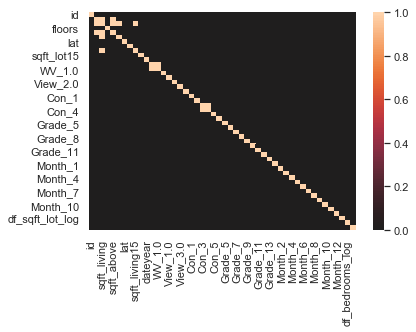

In [155]:
#We can view the multicollinearity clearer using heatmap.
import seaborn as sns
sns.heatmap(abs(df.corr()) > 0.70, center=0);

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8284 entries, 1 to 21591
Data columns (total 49 columns):
id                  8284 non-null int64
date                8284 non-null datetime64[ns]
price               8284 non-null int64
sqft_living         8284 non-null int64
floors              8284 non-null float64
sqft_above          8284 non-null int64
sqft_basement       8284 non-null int64
lat                 8284 non-null float64
long                8284 non-null float64
sqft_living15       8284 non-null int64
sqft_lot15          8284 non-null int64
dateyear            8284 non-null int64
WV_0.0              8284 non-null uint8
WV_1.0              8284 non-null uint8
View_0.0            8284 non-null uint8
View_1.0            8284 non-null uint8
View_2.0            8284 non-null uint8
View_3.0            8284 non-null uint8
View_4.0            8284 non-null uint8
Con_1               8284 non-null uint8
Con_2               8284 non-null uint8
Con_3               8284 non-null uin

In [157]:
# Even though sqft_lot was not detected - it suggests above that there is a relatively high correlation.
df[['sqft_lot15','df_sqft_lot_log']].corr()

,sqft_lot15,df_sqft_lot_log
sqft_lot15,1.000000,0.580862
df_sqft_lot_log,0.580862,1.000000


#### According to high correlation in the above I will be removing the below variables as it is highly correlated to sqft_living. This will avoid Multicollinearity. 

In [158]:
df.drop(['sqft_above','sqft_basement','sqft_living15','sqft_lot15','df_sqft_lot_log','WV_0.0','Con_3',], axis =1, inplace=True)
# I decided to drop Sqft_lot15 as well because it has a fairly high correlation to Sqft_lot15 ~ r=.6




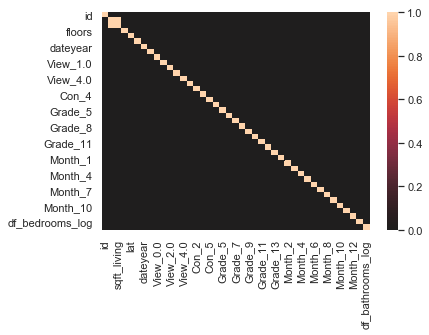

In [159]:
#We can re-view the multicollinearity to make sure we handled all the.
import seaborn as sns
sns.heatmap(abs(df.corr()) > 0.70, center=0);

### Scaling 
##### We will scale the data to help to normalize the data within a particular range.


In [160]:
sqft_living = df.sqft_living 

In [161]:
floors = df.floors

In [162]:
price = df.price

In [163]:
lat =df.lat

In [164]:
long = df.long

In [165]:
scaled_sqft_lot_log = (df_sqft_lot_log-np.mean(df_sqft_lot_log))/np.sqrt(np.var(df_sqft_lot_log))

In [166]:
scaled_floors = (floors-np.mean(floors))/np.sqrt(np.var(floors))

In [167]:
scaled_sqft_living = (sqft_living-np.mean(sqft_living))/np.sqrt(np.var(sqft_living))

In [168]:
scaled_price = (price-np.mean(price))/np.sqrt(np.var(price))

In [169]:
scaled_lat = (lat-np.mean(lat))/np.sqrt(np.var(lat))

In [170]:
scaled_long = (long-np.mean(long))/np.sqrt(np.var(long))

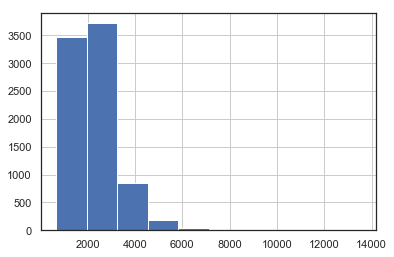

In [171]:
# Let's visualize to compare the scaled data to not scaled one to make sure it worked.
sqft_living.hist()



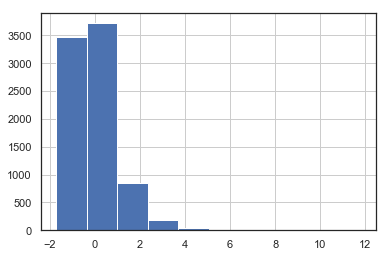

In [172]:
scaled_sqft_living.hist()

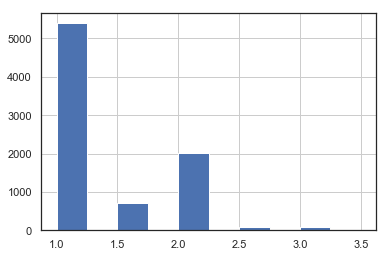

In [173]:
floors.hist()

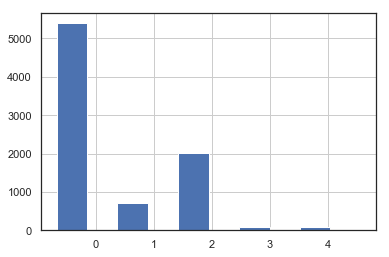

In [174]:
scaled_floors.hist()

In [175]:
df['scaled_sqft_living'] = scaled_sqft_living
df['scaled_sqft_lot_log'] = scaled_sqft_lot_log
df['scaled_floors'] = scaled_floors
df['scaled_price'] =scaled_price
df['scaled_lat'] = scaled_lat
df['scaled_long'] = scaled_long

In [176]:
df.drop(['price','sqft_living', 'floors','lat','long'], axis=1, inplace = True)

# Model Data

#### We will use the stepwise selection in order to select the most fitting variables. 

In [177]:
df.drop(['date','id'], axis =1, inplace=True)

In [178]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

 

      


In [179]:
predictors = df.drop('scaled_price', axis=1)

In [180]:
df.isnull().sum()

dateyear               0
WV_1.0                 0
View_0.0               0
View_1.0               0
View_2.0               0
View_3.0               0
View_4.0               0
Con_1                  0
Con_2                  0
Con_4                  0
Con_5                  0
Grade_4                0
Grade_5                0
Grade_6                0
Grade_7                0
Grade_8                0
Grade_9                0
Grade_10               0
Grade_11               0
Grade_12               0
Grade_13               0
Month_1                0
Month_2                0
Month_3                0
Month_4                0
Month_5                0
Month_6                0
Month_7                0
Month_8                0
Month_9                0
Month_10               0
Month_11               0
Month_12               0
df_bedrooms_log        1
df_bathrooms_log       0
scaled_sqft_living     0
scaled_sqft_lot_log    0
scaled_floors          0
scaled_price           0
scaled_lat             0


In [182]:
df = df.dropna(subset=['df_bedrooms_log'])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8283 entries, 1 to 21591
Data columns (total 41 columns):
dateyear               8283 non-null int64
WV_1.0                 8283 non-null uint8
View_0.0               8283 non-null uint8
View_1.0               8283 non-null uint8
View_2.0               8283 non-null uint8
View_3.0               8283 non-null uint8
View_4.0               8283 non-null uint8
Con_1                  8283 non-null uint8
Con_2                  8283 non-null uint8
Con_4                  8283 non-null uint8
Con_5                  8283 non-null uint8
Grade_4                8283 non-null uint8
Grade_5                8283 non-null uint8
Grade_6                8283 non-null uint8
Grade_7                8283 non-null uint8
Grade_8                8283 non-null uint8
Grade_9                8283 non-null uint8
Grade_10               8283 non-null uint8
Grade_11               8283 non-null uint8
Grade_12               8283 non-null uint8
Grade_13               8283 non-

#### Let's look at the results and see which variables will be added to our model.

In [186]:
y = list(y)

In [189]:
# Let's set up the variables 

X = df.drop(['scaled_price',], axis=1)
y = df[['scaled_price']]

In [190]:
result = stepwise_selection(predictors, df["scaled_price"], verbose = True)
print('resulting features:')
print(result)

ValueError: The indices for endog and exog are not aligned

#### Build the final model again in Statsmodels

In [191]:
import statsmodels.api as sm
X_fin = X[['View_0.0', 'scaled_lat',  'WV_1.0',  'Grade_13', 'Grade_12', 'Grade_11', 'Grade_10', 'Grade_9', 'Con_5', 'Grade_8', 'scaled_long', 'dateyear', 'View_2.0', 'View_4.0', 'scaled_floors', 'df_bedrooms_log', 'Month_1', 'Month_2']]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           scaled_price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     970.9
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:22:34   Log-Likelihood:                -7048.2
No. Observations:                8283   AIC:                         1.413e+04
Df Residuals:                    8264   BIC:                         1.427e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -227.4192     30.844     -7.373      0.000    -287.882    -166.956
View_0.0           -0.4037      0.026    -15.811      0.000      -0.454      -0.354
scaled_lat          0.2018      0.006     31.751      0.000       0.189       0.214
WV_1.0              1.5559      0.071     21.791      0.000       1.416       1.696
Grade_13            7.8869      0.181     43.500      0.000       7.532       8.242
Grade_12            4.0020      0.089     44.821      0.000       3.827       4.177
Grade_11            2.5035      0.048     51.845      0.000       2.409       2.598
Grade_10            1.5013      0.032     46.751      0.000       1.438       1.564
Grade_9             0.8454      0.024     35.738      0.000       0.799       0.892
Con_5               0.3201      0.020     15.937      0.000       0.281       0.359
Grade_8             0.2615      0.015     17.319      0.000       0.232       0.291
scaled_long        -0.0304      0.007     -4.639      0.000      -0.043      -0.018
dateyear            0.1127      0.015      7.358      0.000       0.083       0.143
View_2.0           -0.1721      0.033     -5.198      0.000      -0.237      -0.107
View_4.0            0.2420      0.051      4.781      0.000       0.143       0.341
scaled_floors       0.0456      0.007      6.328      0.000       0.031       0.060
df_bedrooms_log     0.3394      0.024     14.293      0.000       0.293       0.386
Month_1            -0.1440      0.033     -4.325      0.000      -0.209      -0.079
Month_2            -0.1096      0.029     -3.731      0.000      -0.167      -0.052
==============================================================================
Omnibus:                     5440.938   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           305241.792
Skew:                           2.485   Prob(JB):                         0.00
Kurtosis:                      32.321   Cond. No.                     9.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Here we will  run the model with sklearn.linear in order to double-check that we ran our model correctly  

In [192]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_fin, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [193]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [194]:
linreg.coef_

array([[-0.40374128,  0.20176643,  1.5558856 ,  7.88694234,  4.00203312,
         2.50345987,  1.50131562,  0.84538259,  0.32006653,  0.26148467,
        -0.03036543,  0.11267949, -0.17213855,  0.24201528,  0.04558066,
         0.33942285, -0.14395231, -0.10956084]])

In [195]:
linreg.intercept_


array([-227.41915588])

### Train Test Split

#### We will perform a train-test-split with a test set of 0.20.

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
# We will define the X and y test and train data and split so that the test size will be 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size = 0.20)

#### Let's look at a brief preview of our train test split - we will keep it random.

In [198]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

6626 1657 6626 1657


In [199]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)


#### Let's check the accuracy of our data by recalulating the R squared 

In [200]:
linreg.score(X_test, y_test)

0.662365100626968

#### Let's compare the MSE of our train versus test data to make sure it is not over/underfit

In [201]:
# We will use sklearn.metrics to calculate the test data Mean Square Error 

from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

0.3030696839392633

In [202]:
# we wil define our y_hat_train
y_hat_train = linreg.predict(X_train)

In [203]:
# We will use sklearn.metrics to calculate train data MSE 
from sklearn.metrics import mean_squared_error
train_residuals = y_hat_train - y_train

train_mse = mean_squared_error(y_train, y_hat_train)
train_mse

0.3261601629063235

#### Let's check the data's residuals are nornally distributed.

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


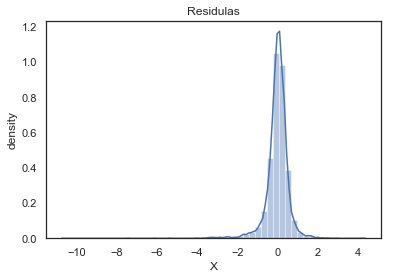

In [204]:
sns.distplot(train_residuals)
plt.title('Residulas' )
plt.xlabel('X')
plt.ylabel('density')
plt.show()